# Feature Engineering (Question 1 of the Homework)

The goal of this notebook is to describe the set of data features used for Machine Learning modeling.

In [1]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Supervised or Unsupervised Learning?

As discussed in the [`next_steps` notebook](../EDA/next_steps.ipynb), the goal of this project is to predict the **Primary Energy consumption per Capita** using regression algorithms. Regressions algorithm are supervised Machine Learning algorithms.

Inputs and outputs features have already been determined in [this notebook](../EDA/next_steps.ipynb):

| Features | Factor | Cofactor | Response |
| ----------------- | :---------: | :---------: | :---------: |
| Access to electricity (% of population)                           | X | | |
| Access to clean fuels for cooking                                 | X | | |
| Renewable energy share in the total final energy consumption (%)  | X | | |
| Primary energy consumption per capita (kWh/person)                | |  | X |
| GDP per capita                                                    | X | | |

We do not have any cofactors because I have picked only features that are highly correlated with the response variable (Primary energy consumption per capita).

## 2. Features Details

Based on the Exploratory Data Analysis, I have saved 3 different datasets to train my regression models:

1. [`pe_dataset.csv`](../data/pe/pe_dataset.csv): This dataset contains all the rows of the main dataset but has only targetted features (inputs and outputs + country name and year).
2. [`normalized_pe_dataset.csv`](../data/pe/normalized_pe_dataset.csv): Same as `pe_dataset.csv` but with normalized numerical features.
3. [`normalized_pe_dataset_without_outliers.csv`](../data/pe/normalized_pe_dataset_without_outliers.csv): Same as `normalized_pe_dataset.csv` but without top outliers.

It will be interesting to watch how the models perform on each dataset. Data features were not collected from experiments or simulations but based on administratives sources, measurements and surveys. More details about that in the [dataset description notebook](../EDA/dataset_description.ipynb).

No Machine Learning models, no data augmentation and PCA have been used to derive the features. Daata features are the raw values from the main dataset that has only been normalized for the second and third datasets.


## 3. Features types

As discussed in the [`datset_sampling` notebook](../EDA/dataset_sampling.ipynb), all of the features (inputs and outputs) are modeled as continuous distributions (I don't take into account the country name and the year which are not relevant). Moreover, all of the features are numerical.

## 4. Data Cleaning

In [36]:
df_pe = pd.read_csv("../data/pe/pe_dataset.csv")
df_pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 5   Primary energy consumption per capita (kWh/person)                3649 non-null   float64
 6   gdp_per_capita                                                    3367 non-null   float64
dtypes: float64(5), int64(1), object(1)

In [37]:
df_pe[df_pe.isna().any(axis=1)]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Primary energy consumption per capita (kWh/person),gdp_per_capita
0,Afghanistan,2000,1.613591,6.20,44.99,302.59482,NaN
1,Afghanistan,2001,4.074574,7.20,45.60,236.89185,NaN
20,Afghanistan,2020,97.700000,33.20,NaN,702.88800,516.747871
21,Albania,2000,100.000000,38.20,NaN,9029.43750,1126.683340
22,Albania,2001,100.000000,40.50,NaN,8635.53200,1281.659826
...,...,...,...,...,...,...,...
3603,Yemen,2017,79.200000,61.35,2.80,1288.87670,NaN
3604,Yemen,2018,62.000000,61.50,3.60,1170.72610,NaN
3605,Yemen,2019,72.751076,61.30,3.11,1475.98520,NaN
3606,Yemen,2020,73.757930,61.50,NaN,1092.00210,NaN


As the dataset is devided by countries, doing a hot deck imputation directly on all the dataset would be a mistake. For instance, data for *France* and for *Yemen* are not comparable. In one hand we have a developed country and in the other hand we have a developing country. Therefore, it is better to do a hot deck imputation for each country separately.

Text(0.5, 1.0, 'Missing values for each feature in the dataset')

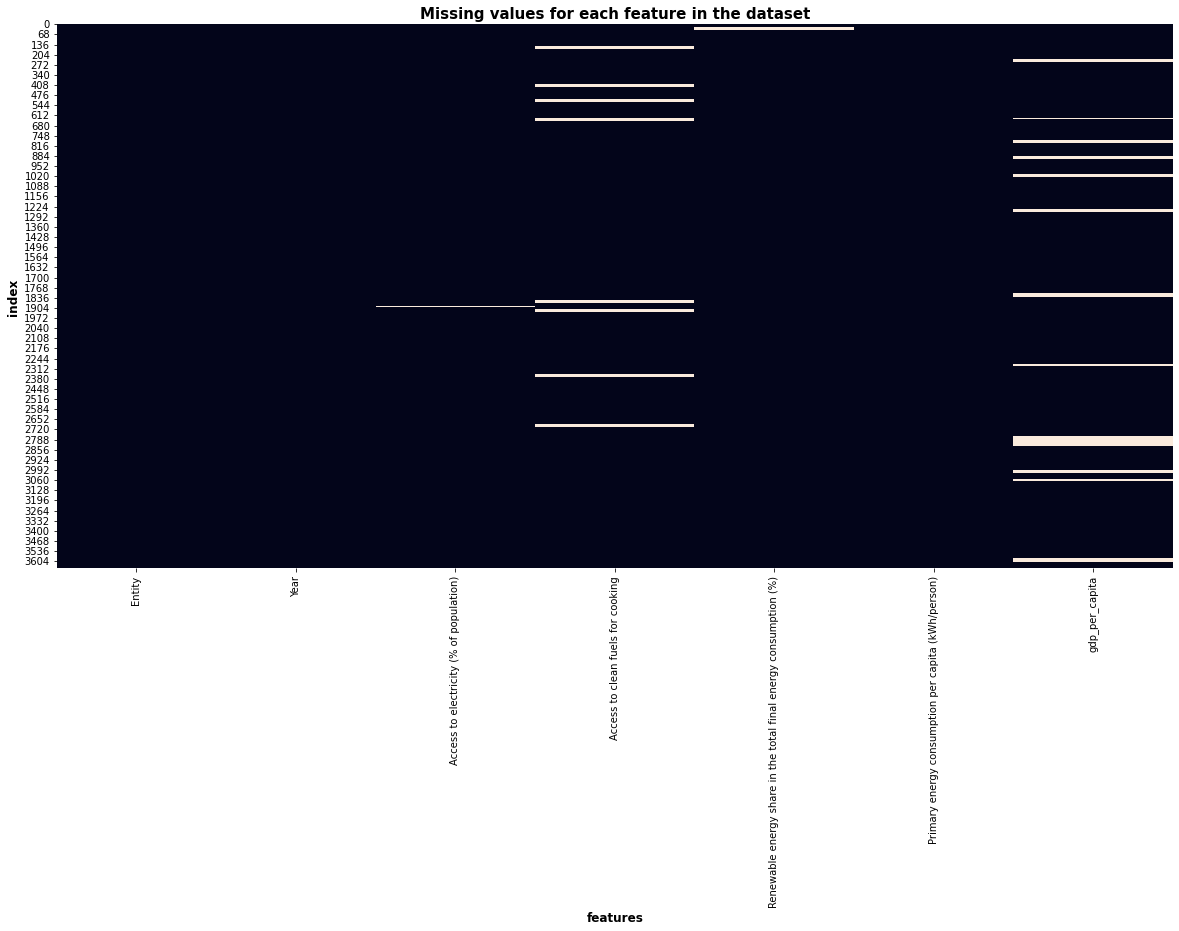

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(df_pe.isnull(), cbar=False)
plt.ylabel('index', fontweight='bold', fontsize=12)
plt.xlabel('features', fontweight='bold', fontsize=12)
plt.title('Missing values for each feature in the dataset', fontweight='bold', fontsize=15)

Due to the fact that we don't have a huge amount of missing values that will be imputed, I have decided to use an interpolation startegy for each country (it might not change a lot the distribution). 

In [38]:
countries = df_pe['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

In [39]:
for country in countries:
    df_pe[df_pe['Entity'] == country] = df_pe[df_pe['Entity'] == country].interpolate(method='linear', limit_direction='forward', axis=0)

For other missing values, we will drop the rows that contain them. After this step, we still have more than 3,000 rows which is enough to train our models.

In [42]:
df_pe = df_pe.dropna(axis=0)
df_pe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 2 to 3648
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3193 non-null   object 
 1   Year                                                              3193 non-null   int64  
 2   Access to electricity (% of population)                           3193 non-null   float64
 3   Access to clean fuels for cooking                                 3193 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3193 non-null   float64
 5   Primary energy consumption per capita (kWh/person)                3193 non-null   float64
 6   gdp_per_capita                                                    3193 non-null   float64
dtypes: float64(5), int64(1), object(1)